In [27]:
import numpy as np
import matplotlib.pyplot as plt                 #For plotting
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
from pyliso import plotTF, plotTFs
import datetime
import time
from scipy.optimize import curve_fit
import scipy.constants as scicon
figlist = []
#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'lines.linewidth': 2.0}
pylab.rcParams.update(params)
#********************************************************************************************************
mList = ['o','v','^','<','>','s','p','*','H','+','X','D']
cList = ['#0072b2','#009e73','#d55e00','#cc79a7','#56b4e9'] #5
lsList = ['-','--','-.',':']  #4

In [41]:
def plotFBread(fullData, labelString, ylabel, plotInd=1, startInd = 0, stopInd = -1, averaged_Over = None, fig=None):
    data = fullData[startInd:stopInd,:]
    indToKeep = []
    refTimeString = time.strftime("%b %d %Y %H:%M:%S", time.gmtime(data[0,0] + 315939582))
    titleString = (time.strftime("From %b %d %Y %H:%M:%S",
                                time.gmtime(data[0,0] + 315939582))
                   + time.strftime(" to %b %d %Y %H:%M:%S",
                                time.gmtime(data[-1,0] + 315939582)))
    
    ts = data[:,0] - data[0,0]
    x_axisLable = 's'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'min'
    
    if ts[-1]-ts[0]>5*60:
        ts = ts/60
        x_axisLable = 'hrs'
    
    if ts[-1]-ts[0]>5*24:
        ts = ts/24
        x_axisLable = 'days'
    
    if fig is None:
        fig = plt.figure(figsize=[16,12])
    ax = fig.gca()
    
    if len(ts)>2000:
        fac = len(ts)//2000
        toPlotx = ts[::fac]
        toPloty = data[::fac,plotInd]
    else:
        toPlotx = ts
        toPloty = data[:,1]
        
    ax.plot(toPlotx, toPloty, label = labelString)
    ax.set_xlabel('Time ['+ x_axisLable + '] from ' + refTimeString)
    ax.set_ylabel(ylabel)
    ax.grid(linestyle='solid', which='major', alpha=0.75)
    ax.grid(linestyle='dashed', which='minor', alpha=0.25)
    ax.legend()
    ax.set_title(titleString)
    return fig

In [39]:
Data = np.loadtxt('VacCanTempNearGlitch_13-11-2019_175038.txt')
Heater = np.transpose(np.vstack([Data[:,0], Data[:,3]]))

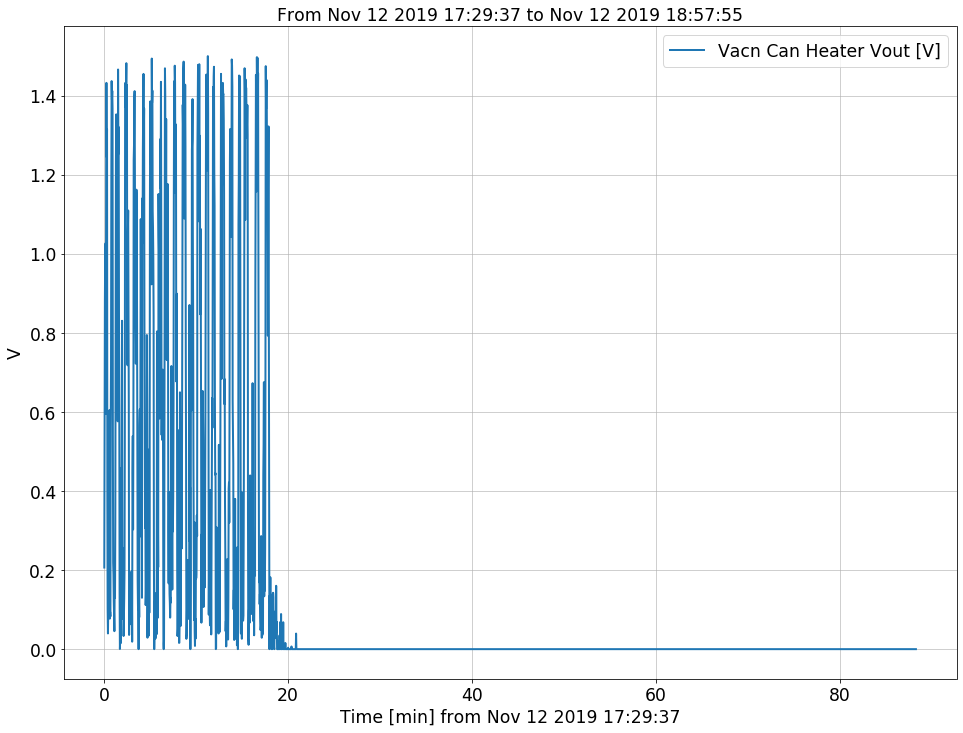

In [40]:
fig = plotFBread(Data, 'Vac Can Heater Vout [V]', 'V', plotInd=3);


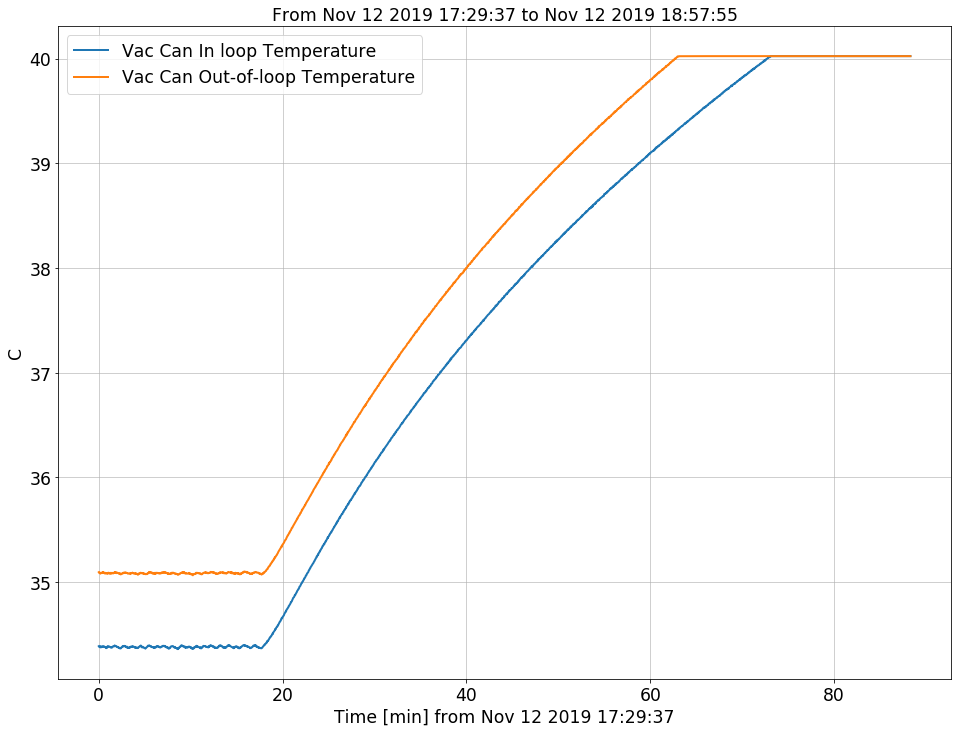

In [42]:
fig = plotFBread(Data, 'Vac Can In loop Temperature', 'C', plotInd=1);
plotFBread(Data, 'Vac Can Out-of-loop Temperature', 'C', plotInd=2, fig=fig);